<a href="https://colab.research.google.com/github/dipika0305/Estimation-of-Obesity-Levels/blob/main/ML_Predictive_Learning_Estimation_of_Obesity_Levels.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MIT License** \\

Copyright (c) 2023 Dipika Mohanty

Permission is hereby granted, free of charge, to any person obtaining a copy of this software and associated documentation files (the "Software"), to deal in the Software without restriction, including without limitation the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the Software, and to permit persons to whom the Software is furnished to do so, subject to the following conditions:

The above copyright notice and this permission notice shall be included in all copies or substantial portions of the Software.

THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY, FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM, OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN THE SOFTWARE.
 
 \\

**Abstract:**

Based on their eating patterns and physical state, the participants in this dataset from Mexico, Peru, and Colombia had their obesity levels estimated. 

\\

**Aim:** \\

The objective is to build a predictive learning model and check the quality of the data and determine which features are important. 

\\

**Variable Description:** \\

\\

**Gender**: Female/Male \\
**Age**: Numeric value \\
**Height**: Numeric value in meters \\
**Weight**: Numeric value in kilograms  \\
**family_history_with_overweight**: Has a family member suffered or suffers from overweight? Yes/No \\
**FAVC**: Do you eat high caloric food frequently? Yes/No \\
**FCVC**: Do you usually eat vegetables in your meals? \\
**NCP**: How many main meals do you have daily? Between One/Two/Three/More than three \\
**CAEC**: Do you eat any food between meals? No/Sometimes/Frequently/Always \\
**SMOKE**: Do you smoke? Yes/No \\
**CH20**: How much water do you drink daily? Less than a liter/Between 1 and 2 L/More than 2 L \\
**SCC**: Do you monitor the calories you eat daily? Yes/No \\
**FAF**: How many hours do you perform physical activity? \\
**TUE**: How many hours do you use technological devices such as cell phone, videogames, television, computer and others? \\
**CALC**: How often do you drink alcohol? No/Sometimes/Frequently/Always \\
**MTRANS**: Which transportation do you usually use? Automobile/Motorbike/Bike/Public Transportation/Walking \\
**NObeyesdad**: Obesity Level - Insufficient Weight / Normal Weight / Overweight Level I / Overweight Level II / Obesity Type I / Obesity Type II / Obesity Type III



##### Importing Libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pylab as plt
from matplotlib import pyplot
from statsmodels.graphics.gofplots import qqplot

!pip3 install fitter
from fitter import Fitter, get_common_distributions, get_distributions

from sklearn import preprocessing
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

!pip install fancyimpute
from fancyimpute import KNN

!pip3 install eli5
import eli5
from eli5.sklearn import PermutationImportance

!pip3 install shap
import shap


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
#Read the data from csv
data = pd.read_csv("https://raw.githubusercontent.com/dipika0305/Estimation-of-Obesity-Levels/main/ObesityDataSet_raw_and_data_sinthetic.csv");

In [ ]:
#Viewing the data in file
data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


# Exploratory Data Analysis

**Question 1**: What are the data types? (Only numeric and categorical)

Numerical Attributes: Age, Height, Weight, FCVC, NCP, CH2O, FAF, TUE

Categorical Attributes: Gender, family_history_with_overweight, FAVC, CAEC, SMOKE, SCC, CALC, MTRANS, NObeyesdad

In [ ]:
#Data types in the source data
data.info();

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

In [ ]:
# Categorical or Numerical Coloumns
categorical_columns = [
    col for col in data.columns if data[col].dtype == "object"
]
print("Categorical Columns : ", categorical_columns)

categorical_columns = list(set(categorical_columns))

numerical_columns = [col for col in data.columns if col not in categorical_columns]
print("Numerical Columns : ", numerical_columns)

Categorical Columns :  ['Gender', 'family_history_with_overweight', 'FAVC', 'CAEC', 'SMOKE', 'SCC', 'CALC', 'MTRANS', 'NObeyesdad']
Numerical Columns :  ['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']


**Question 2**: Are there missing values?

In [ ]:
#Checking for missing data values
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

It is clear from above output that none of the columns have any missing data.

**Question 5**: Which independent variables have missing data? How much?

A. None of the independent variables have missing data.


**Question 7**: Are the predictor variables independent of all the other predictor variables?

A. To check for independence between predictor variables, we can use Multicollinearity Test and Pair Plots. These tests are used to check if there is a high degree of correlation between the predictor variables.

Note: See cell [233] for the Heatmap of correlation matrix.

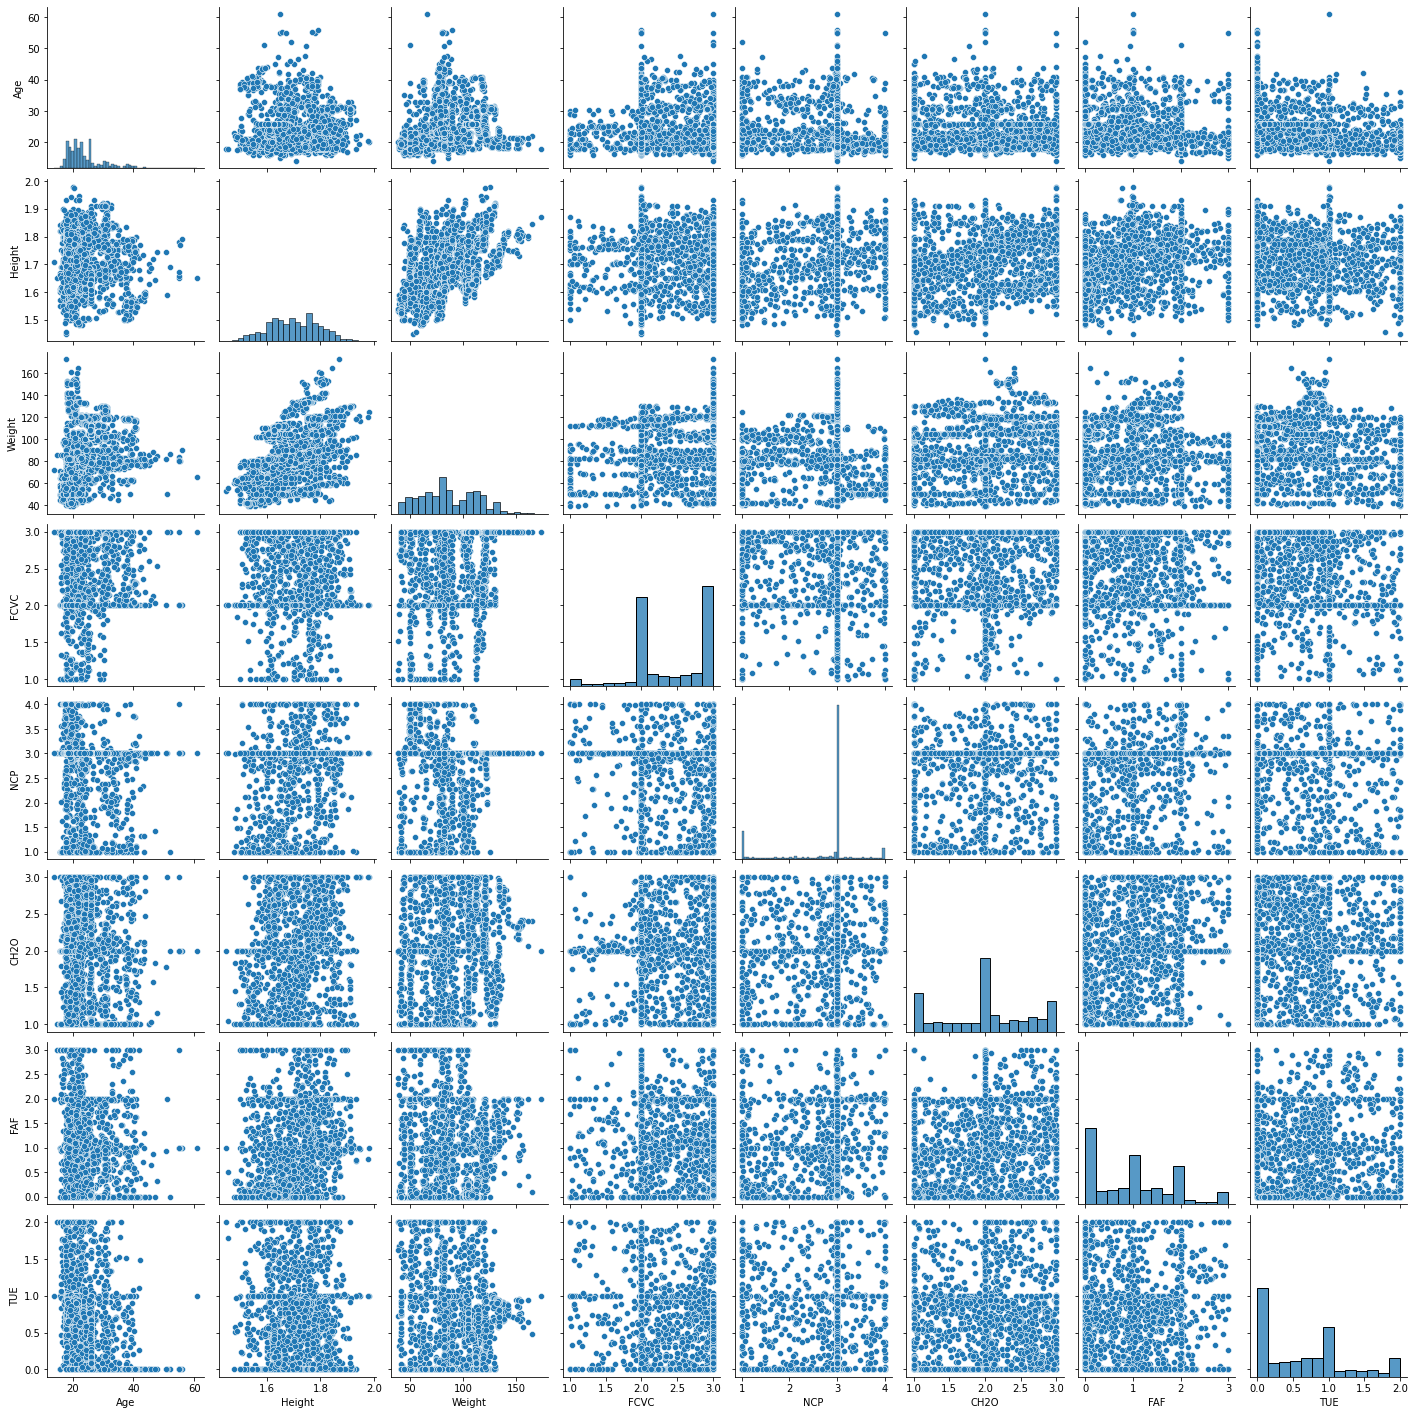

In [ ]:
# Pair plot to check the correlation between predictor variables (collinearity)
sns.pairplot(data)

Pair plots show that there is not much multicollinearity between the predictor variables.

### Distributions of Numeric Variables



**Question 3**: What are the likely distributions of the numeric variables?


<Figure size 576x360 with 0 Axes>

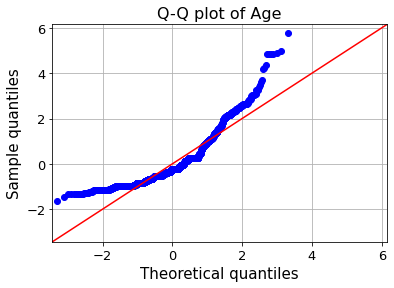

<Figure size 576x360 with 0 Axes>

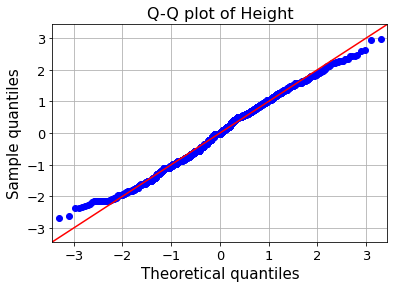

<Figure size 576x360 with 0 Axes>

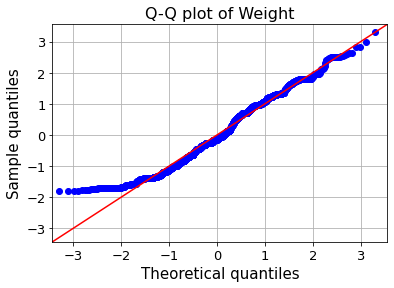

<Figure size 576x360 with 0 Axes>

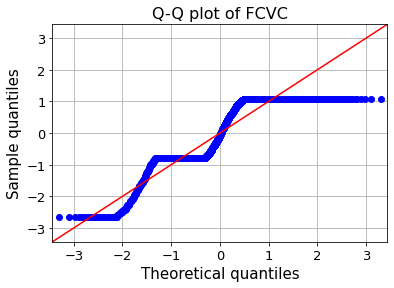

<Figure size 576x360 with 0 Axes>

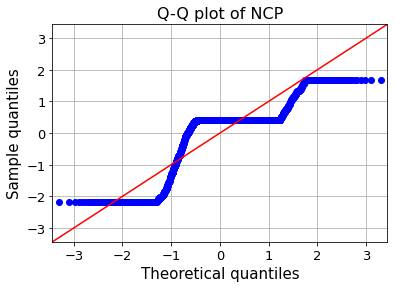

<Figure size 576x360 with 0 Axes>

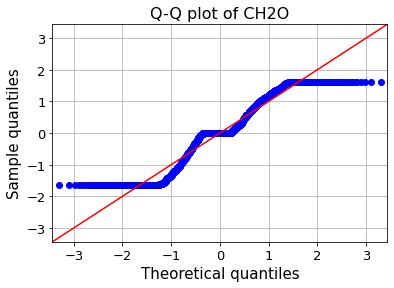

<Figure size 576x360 with 0 Axes>

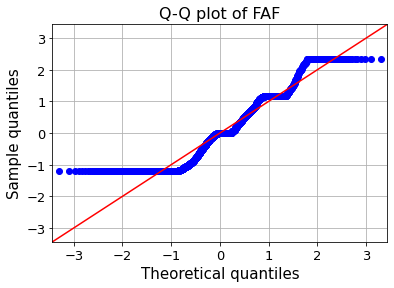

<Figure size 576x360 with 0 Axes>

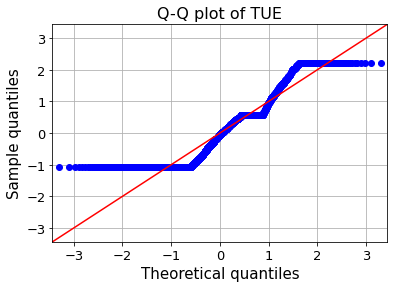

In [ ]:
#Analyzing the distribution of independent variables
data_norm = data[['Age', 'Height', 'Weight', 'FCVC', 'NCP', 'CH2O', 'FAF', 'TUE']]
for c in data_norm.columns[:]:
  plt.figure(figsize=(8,5))
  fig=qqplot(data_norm[c],line='45',fit='True')
  plt.xticks(fontsize=13)
  plt.yticks(fontsize=13)
  plt.xlabel("Theoretical quantiles",fontsize=15)
  plt.ylabel("Sample quantiles",fontsize=15)
  plt.title("Q-Q plot of {}".format(c),fontsize=16)
  plt.grid(True)
  plt.show()


**Question 10**: What are the distributions of the predictor variables?

#### Distributions of the numerical predictor variables:

Text(0.5, 0, 'Age')

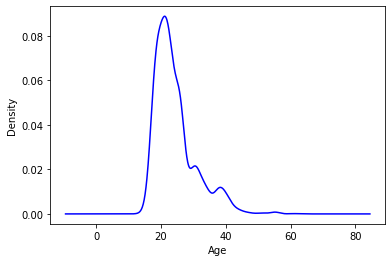

In [ ]:
# Plotting the distribution of Age
data.Age.plot.density(color="Blue")
plt.xlabel("Age")

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  9.60it/s]

          sumsquare_error        aic          bic  kl_div  ks_statistic  \
exponpow       131.689551  14.317713 -5833.940963     inf      0.036252   
norm           136.610477 -15.613714 -5764.150942     inf      0.047376   
gamma          136.683050 -13.915250 -5755.374873     inf      0.047894   
lognorm        136.973585 -14.391292 -5750.892469     inf      0.048924   
chi2           138.981093 -16.794445 -5720.177824     inf      0.054672   

          ks_pvalue  
exponpow   0.007593  
norm       0.000148  
gamma      0.000120  
lognorm    0.000079  
chi2       0.000006  


Text(0.5, 0, 'Height')

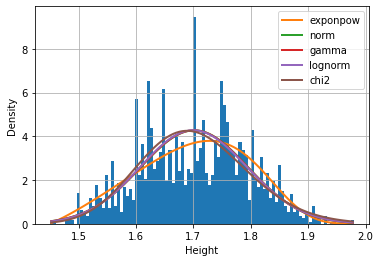

In [ ]:
# Plotting the distribution of Height
Height = data["Height"].values
f = Fitter(Height, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Height")

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.51it/s]

          sumsquare_error          aic           bic  kl_div  ks_statistic  \
rayleigh         0.003448  1074.879384 -28113.301906     inf      0.066568   
gamma            0.003536  1078.641844 -28052.423054     inf      0.070652   
chi2             0.003536  1078.641879 -28052.422811     inf      0.070652   
lognorm          0.003547  1085.046687 -28045.880231     inf      0.068250   
norm             0.003594  1114.007615 -28025.991374     inf      0.060316   

             ks_pvalue  
rayleigh  1.410902e-08  
gamma     1.313671e-09  
chi2      1.313624e-09  
lognorm   5.399675e-09  
norm      4.056216e-07  


Text(0.5, 0, 'Weight')

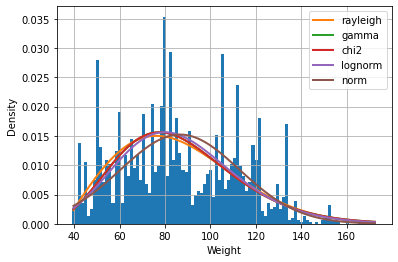

In [ ]:
# Plotting the distribution of Weight
Weight = data["Weight"].values
f = Fitter(Weight, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("Weight")

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.42it/s]

          sumsquare_error         aic          bic  kl_div  ks_statistic  \
powerlaw       429.434891  221.296984 -3338.690678     inf      0.308858   
exponpow       443.135968  239.386318 -3272.391534     inf      0.201274   
gamma          444.800773  243.981304 -3264.475636     inf      0.168796   
chi2           444.848673  243.998098 -3264.248317     inf      0.170652   
norm           445.002412  240.837320 -3271.173801     inf      0.173713   

              ks_pvalue  
powerlaw  2.544036e-179  
exponpow   1.930385e-75  
gamma      4.768240e-53  
chi2       3.221115e-54  
norm       3.533492e-56  


Text(0.5, 0, 'FCVC')

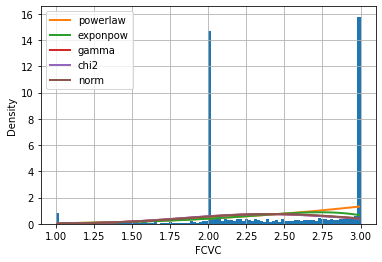

In [ ]:
# Plotting the distribution of FCVC
FCVC = data["FCVC"].values
f = Fitter(FCVC, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("FCVC")

Fitting 10 distributions: 100%|██████████| 10/10 [00:00<00:00, 10.38it/s]


          sumsquare_error         aic          bic    kl_div  ks_statistic  \
exponpow       374.768333  269.823693 -3626.128832  1.417256      0.299998   
norm           377.345206  267.182258 -3619.318378  1.410437      0.340208   
lognorm        377.369644  269.410978 -3611.526752  1.411564      0.341267   
gamma          377.837996  268.586721 -3608.908418  1.408465      0.339466   
powerlaw       379.195957  239.522359 -3601.335023  1.385592      0.309191   

              ks_pvalue  
exponpow  5.483764e-169  
norm      1.497507e-218  
lognorm   5.963434e-220  
gamma     1.418991e-217  
powerlaw  1.025639e-179  


Text(0.5, 0, 'NCP')

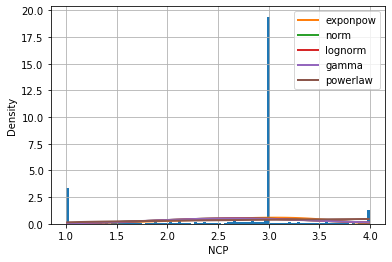

In [ ]:
# Plotting the distribution of NCP
NCP = data["NCP"].values
f = Fitter(NCP, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("NCP")

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  8.17it/s]

          sumsquare_error         aic          bic    kl_div  ks_statistic  \
powerlaw       151.712957  203.842197 -5535.143619  0.620548      0.390817   
chi2           158.322440  234.921207 -5445.123362  0.671065      0.237141   
exponpow       159.067294  213.235876 -5435.215105  0.701276      0.352606   
uniform        160.485404  142.629436 -5424.133529  0.489195      0.138217   
cauchy         161.164546  240.424403 -5415.219042  0.658700      0.110090   

              ks_pvalue  
powerlaw  6.038594e-291  
chi2      6.311160e-105  
exponpow  3.100045e-235  
uniform    1.216978e-35  
cauchy     9.739599e-23  


Text(0.5, 0, 'CH2O')

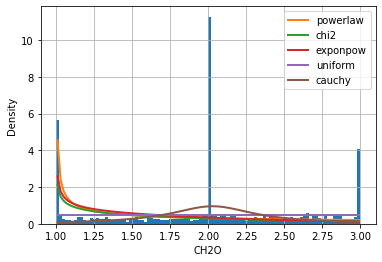

In [ ]:
# Plotting the distribution of CH2O
CH2O = data["CH2O"].values
f = Fitter(CH2O, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("CH2O")

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  6.25it/s]


          sumsquare_error         aic          bic  kl_div  ks_statistic  \
exponpow        42.347533  417.295699 -8228.948765     inf      0.360089   
lognorm         46.599972  603.052259 -8026.947674     inf      0.404988   
powerlaw        50.446802  272.442427 -7859.504374     inf      0.194694   
gamma           55.843491  393.859187 -7644.955817     inf      0.343059   
chi2            63.382910  311.764016 -7377.616034     inf      0.243006   

              ks_pvalue  
exponpow  1.248487e-245  
lognorm   2.683588e-313  
powerlaw   1.412055e-70  
gamma     2.498008e-222  
chi2      3.134371e-110  


Text(0.5, 0, 'FAF')

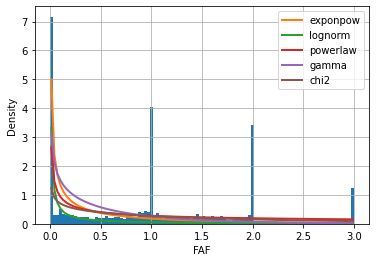

In [ ]:
# Plotting the distribution of FAF
FAF = data["FAF"].values
f = Fitter(FAF, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("FAF")

Fitting 10 distributions: 100%|██████████| 10/10 [00:01<00:00,  5.71it/s]


          sumsquare_error         aic          bic    kl_div  ks_statistic  \
exponpow       106.585939  428.732335 -6280.408306  0.695581      0.380470   
lognorm        196.396098  676.904026 -4990.203262  0.625884      0.510617   
gamma          203.158641  314.453224 -4918.738251  0.818247      0.289067   
expon          220.782286  224.262488 -4750.779230  0.657143      0.267017   
chi2           221.293354  227.160329 -4738.243405  0.581723      0.301922   

              ks_pvalue  
exponpow  3.290392e-275  
lognorm    0.000000e+00  
gamma     1.090842e-156  
expon     2.240219e-133  
chi2      3.340036e-171  


Text(0.5, 0, 'TUE')

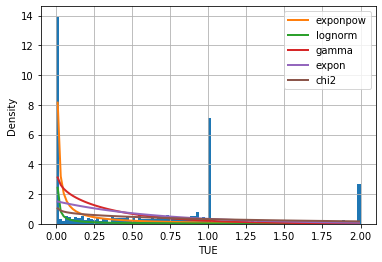

In [ ]:
# Plotting the distribution of TUE
TUE = data["TUE"].values
f = Fitter(TUE, distributions=get_common_distributions())
f.fit()
print(f.summary())
plt.ylabel("Density")
plt.xlabel("TUE")

#### Distributions of the categorical predictor variables:

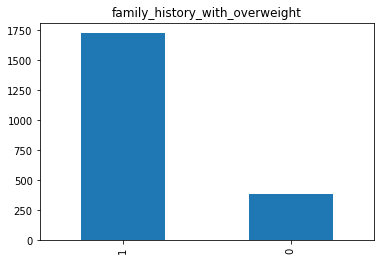

In [ ]:
# Distribution of family_history_with_overweight
plt.title("family_history_with_overweight")
data["family_history_with_overweight"].value_counts().plot(kind="barh")

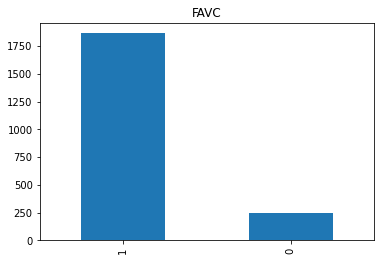

In [ ]:
# Distribution of FAVC
plt.title("FAVC")
data["FAVC"].value_counts().plot(kind="barh")

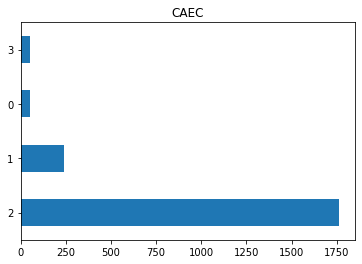

In [ ]:
# Distribution of CAEC
plt.title("CAEC")
data["CAEC"].value_counts().plot(kind="barh")

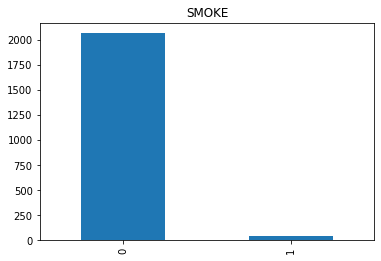

In [ ]:
# Distribution of SMOKE
plt.title("SMOKE")
data["SMOKE"].value_counts().plot(kind="barh")

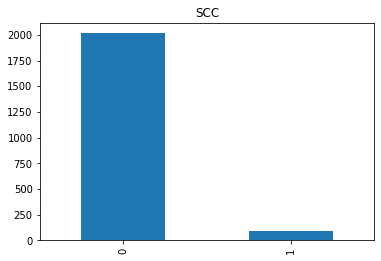

In [ ]:
# Distribution of SCC
plt.title("SCC")
data["SCC"].value_counts().plot(kind="barh")

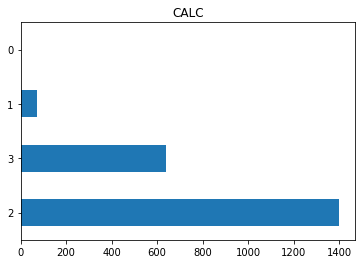

In [ ]:
# Distribution of CALC
plt.title("CALC")
data["CALC"].value_counts().plot(kind="barh")

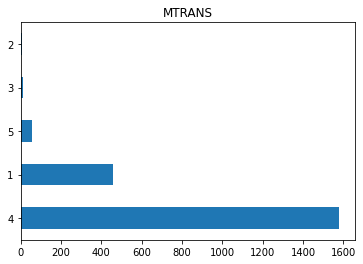

In [ ]:
# Distribution of MTRANS
plt.title("MTRANS")
data["MTRANS"].value_counts().plot(kind="barh")

### Converting categorical attributes to binary values by using One-Hot and Label Encoding


In [ ]:
# Perform One-Hot Encoding

one_hot = {'Male':0, 'Female':1, 'no':0, 'yes':1, 'Automobile':1, 'Bike':2, 'Motorbike':3, 'Public_Transportation':4, 'Walking':5, 
           'Insufficient_Weight':1, 'Normal_Weight':2, 'Obesity_Type_I':3, 'Obesity_Type_II':4, 'Obesity_Type_III':5, 'Overweight_Level_I':6,
           'Overweight_Level_II':7}

data.Gender = [one_hot[item] for item in data.Gender]
data.family_history_with_overweight = [one_hot[item] for item in data.family_history_with_overweight]
data.FAVC = [one_hot[item] for item in data.FAVC]
data.SMOKE = [one_hot[item] for item in data.SMOKE]
data.SCC = [one_hot[item] for item in data.SCC]
data.MTRANS = [one_hot[item] for item in data.MTRANS]
data.NObeyesdad = [one_hot[item] for item in data.NObeyesdad]


# Perform Label Encoding
le = preprocessing.LabelEncoder()

data['CAEC'] = le.fit_transform(data['CAEC'])
data['CALC'] = le.fit_transform(data['CALC'])

data.head()
#data.to_csv(r'output_cat to num.csv')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,21.0,1.62,64.0,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,4,2
1,1,21.0,1.52,56.0,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,4,2
2,0,23.0,1.80,77.0,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,4,2
3,0,27.0,1.80,87.0,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,5,6
4,0,22.0,1.78,89.8,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,4,7


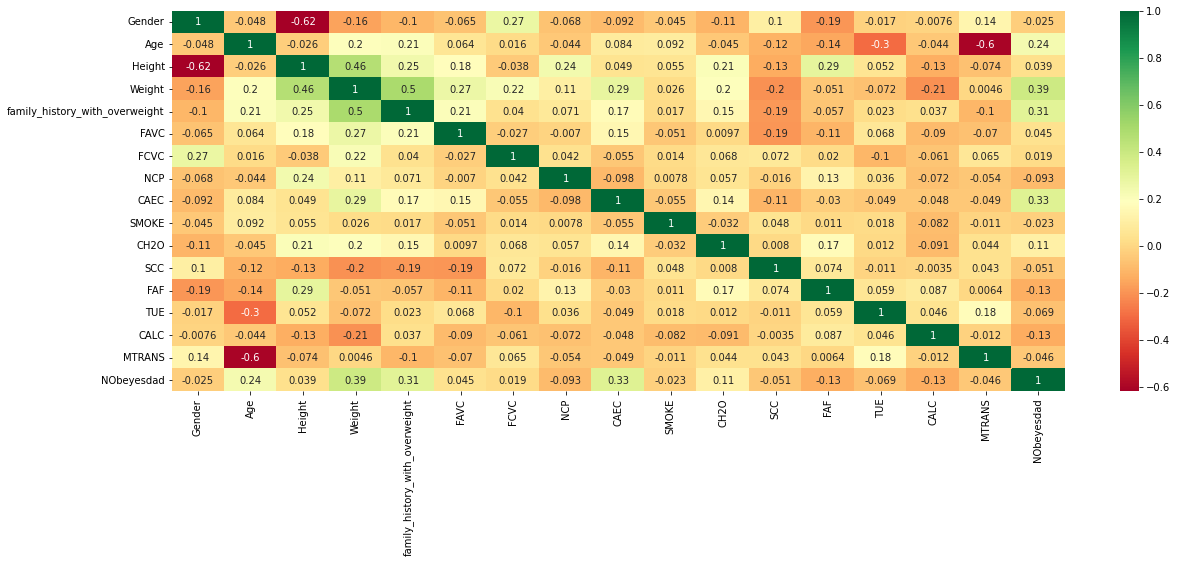

In [ ]:
#the heat map of the correlation
plt.figure(figsize=(20,7))
sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

Heatmap of correlation matrix shows that there is not much multicollinearity between the predictor variables.

**Question 9**: Do the ranges of the predictor variables make sense?

A. The data in Age and Weight columns beacuse the value is too high when compared to other independent variable. Hence, used a min-max scaling to bring the ranges of the variables in similar ranges. 




In [ ]:
# Statistical Summary of the Dataset
data.describe()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000,2111.000000
mean,0.494079,24.312600,1.701677,86.586058,0.817622,0.883941,2.419043,2.685628,1.859308,0.020843,2.008011,0.045476,1.010298,0.657866,2.268593,3.365230,4.015632
std,0.500083,6.345968,0.093305,26.191172,0.386247,0.320371,0.533927,0.778039,0.468543,0.142893,0.612953,0.208395,0.850592,0.608927,0.515498,1.261423,1.952090
min,0.000000,14.000000,1.450000,39.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,19.947192,1.630000,65.473343,1.000000,1.000000,2.000000,2.658738,2.000000,0.000000,1.584812,0.000000,0.124505,0.000000,2.000000,4.000000,2.000000
50%,0.000000,22.777890,1.700499,83.000000,1.000000,1.000000,2.385502,3.000000,2.000000,0.000000,2.000000,0.000000,1.000000,0.625350,2.000000,4.000000,4.000000
75%,1.000000,26.000000,1.768464,107.430682,1.000000,1.000000,3.000000,3.000000,2.000000,0.000000,2.477420,0.000000,1.666678,1.000000,3.000000,4.000000,6.000000
max,1.000000,61.000000,1.980000,173.000000,1.000000,1.000000,3.000000,4.000000,3.000000,1.000000,3.000000,1.000000,3.000000,2.000000,3.000000,5.000000,7.000000


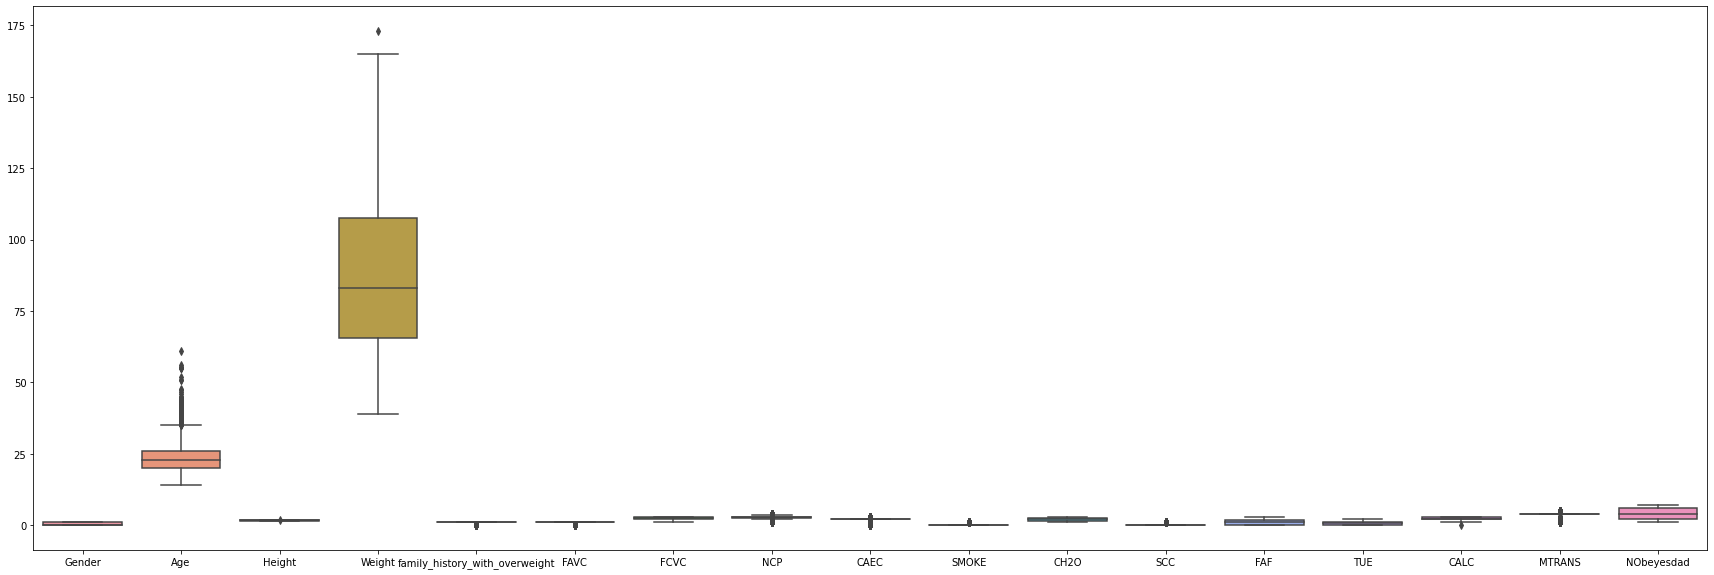

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable
plt.figure(figsize=(30,10))
sns.boxplot(data=data)

In [ ]:
# Normalizing the data in Age and Weight columns beacuse the value is too high when compared to other independent variable


# Create a variable to store scaled values as floats
x = data[['Weight']].values.astype(float)
y = data[['Age']].values.astype(float)

# Preparing for normalizing
min_max_scaler = preprocessing.MinMaxScaler()

# Transform the data to fit minmax processor
x_scaled = min_max_scaler.fit_transform(x)
y_scaled = min_max_scaler.fit_transform(y)

# Run the normalizer on the dataframe
data[['Weight']] = pd.DataFrame(x_scaled)
data[['Age']] = pd.DataFrame(y_scaled)

data.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,1,0.148936,1.62,0.186567,1,0,2.0,3.0,2,0,2.0,0,0.0,1.0,3,4,2
1,1,0.148936,1.52,0.126866,1,0,3.0,3.0,2,1,3.0,1,3.0,0.0,2,4,2
2,0,0.191489,1.80,0.283582,1,0,2.0,3.0,2,0,2.0,0,2.0,1.0,1,4,2
3,0,0.276596,1.80,0.358209,0,0,3.0,3.0,2,0,2.0,0,2.0,0.0,1,5,6
4,0,0.170213,1.78,0.379104,0,0,2.0,1.0,2,0,2.0,0,0.0,0.0,2,4,7


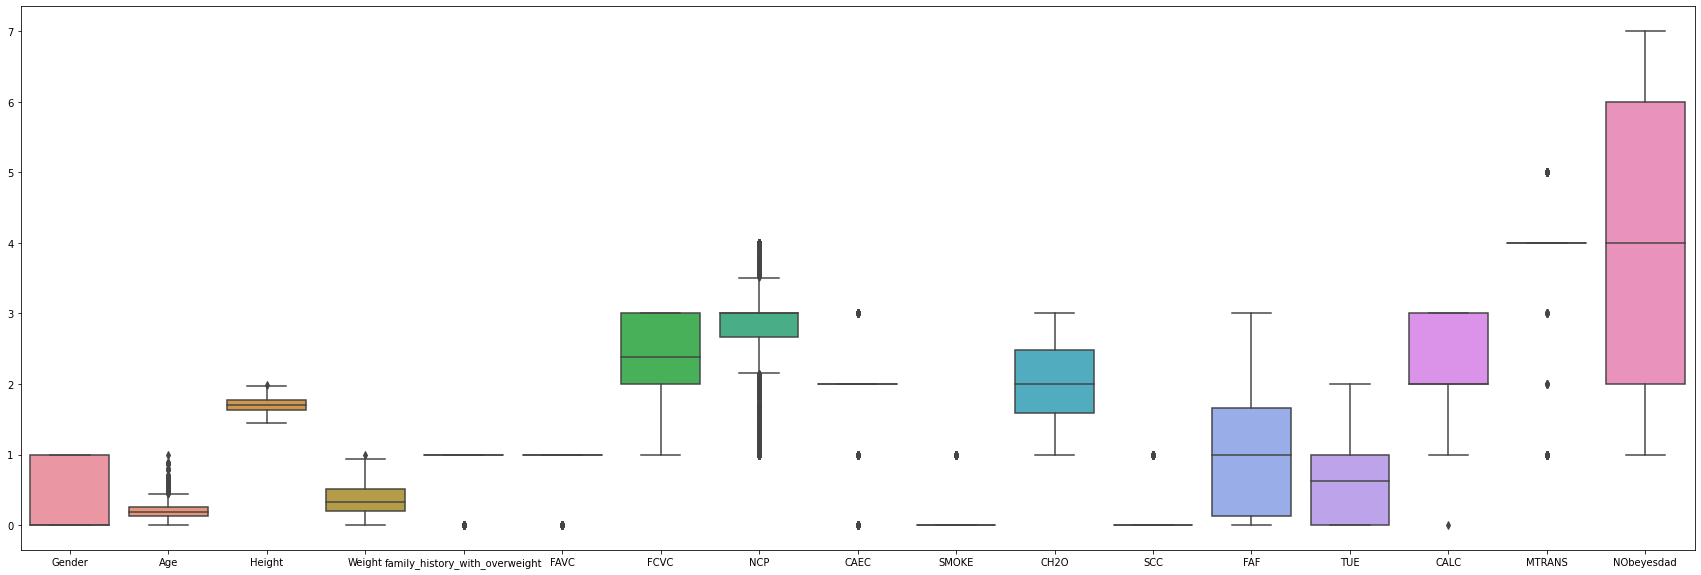

In [ ]:
# Checking the Ranges of the predictor variables and dependent variable after normalizing
plt.figure(figsize=(30,10))
sns.boxplot(data=data)

# Data Imputation

In [ ]:
# Selecting 1000 random rows with no null data points
data_impute = data.copy()
data_impute = data_impute.sample(n=1000)

In [ ]:
# Double checking the data, if we got any null data points
data_impute.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [ ]:
# Creating three extra coloumns of Height for performing Data Imputation techniques
data_impute["Height_1_percent"] = data_impute[["Height"]]
data_impute["Height_5_percent"] = data_impute[["Height"]]
data_impute["Height_10_percent"] = data_impute[["Height"]]

In [ ]:
data_impute

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad,Height_1_percent,Height_5_percent,Height_10_percent
1986,1,0.153420,1.716497,0.685605,1,1,3.000000,3.000000,2,0,1.301657,0,1.718543,0.947884,2,4,5,1.716497,1.716497,1.716497
442,0,0.255319,1.720000,0.194030,1,1,2.000000,3.000000,2,0,2.000000,0,0.000000,1.000000,2,5,2,1.720000,1.720000,1.720000
1526,0,0.371434,1.874070,0.670653,1,1,2.956297,3.000000,2,1,1.275100,0,0.901924,1.875023,2,1,4,1.874070,1.874070,1.874070
593,0,0.090944,1.824655,0.146428,1,1,2.140840,4.000000,2,0,2.931438,0,2.000000,1.164457,3,1,1,1.824655,1.824655,1.824655
1672,0,0.357367,1.668478,0.459283,1,1,2.955300,2.378211,2,0,1.000000,0,1.738267,0.394533,3,4,4,1.668478,1.668478,1.668478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359,1,0.404255,1.560000,0.067164,1,0,2.000000,3.000000,2,0,2.000000,0,1.000000,0.000000,2,4,2,1.560000,1.560000,1.560000
117,1,0.063830,1.700000,0.343284,1,0,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,3,4,7,1.700000,1.700000,1.700000
2037,1,0.255319,1.609370,0.495577,1,1,3.000000,3.000000,2,0,2.609052,0,0.000000,0.548590,2,4,5,1.609370,1.609370,1.609370
2075,1,0.155961,1.747987,0.808180,1,1,3.000000,3.000000,2,0,2.336349,0,1.416400,0.711724,2,4,5,1.747987,1.747987,1.747987


In [ ]:
# Function to calculate percentage of missing data in dataset
def get_percent_missing(dataframe):

    percent_missing = dataframe.isnull().sum() * 100 / len(dataframe)
    missing_value_df = pd.DataFrame(
        {"column_name": dataframe.columns, "percent_missing": percent_missing}
    )
    return missing_value_df


# Function to remove data
def remove_data(dataframe, percent, col):
    dataframe.loc[dataframe.sample(frac=percent).index, col] = np.nan

print(get_percent_missing(data_impute))

                                                   column_name  \
Gender                                                  Gender   
Age                                                        Age   
Height                                                  Height   
Weight                                                  Weight   
family_history_with_overweight  family_history_with_overweight   
FAVC                                                      FAVC   
FCVC                                                      FCVC   
NCP                                                        NCP   
CAEC                                                      CAEC   
SMOKE                                                    SMOKE   
CH2O                                                      CH2O   
SCC                                                        SCC   
FAF                                                        FAF   
TUE                                                        TUE   
CALC      

In [ ]:
# Remove data values in respected coloumns to perform data imputation

remove_data(data_impute, 0.01, "Height_1_percent")
remove_data(data_impute, 0.05, "Height_5_percent")
remove_data(data_impute, 0.1, "Height_10_percent")
print(data_impute.isnull().sum())

print(get_percent_missing(data_impute))

Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
Height_1_percent                   10
Height_5_percent                   50
Height_10_percent                 100
dtype: int64
                                                   column_name  \
Gender                                                  Gender   
Age                                                        Age   
Height                       

### Data Imputation using KNN

In [ ]:
imputer = KNN()

print(data_impute.isnull().sum())

data_impute_knn = data_impute.copy(deep=True)

cols = ['Height_1_percent', 'Height_5_percent', 'Height_10_percent']
knn_impute_df = pd.DataFrame(
          (imputer.fit_transform(data_impute_knn[cols])), columns = cols
      )

data_impute_knn[cols] = knn_impute_df[cols].values

print("\nAfter Imputing the Data\n")
print(data_impute_knn.isnull().sum())

knn_impute_df['Height_Original'] = data['Height'].copy(deep=True)
knn_impute_df['orignalVimputed_1'] = knn_impute_df['Height_Original'].sub(knn_impute_df['Height_1_percent'], axis = 0)
knn_impute_df['orignalVimputed_5'] = knn_impute_df['Height_Original'].sub(knn_impute_df['Height_5_percent'], axis = 0)
knn_impute_df['orignalVimputed_10'] = knn_impute_df['Height_Original'].sub(knn_impute_df['Height_10_percent'], axis = 0)

percent_change_1 = (knn_impute_df['orignalVimputed_1'].sum() / knn_impute_df['orignalVimputed_1'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

percent_change_5 = (knn_impute_df['orignalVimputed_5'].sum() / knn_impute_df['orignalVimputed_5'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

percent_change_10 = (knn_impute_df['orignalVimputed_10'].sum() / knn_impute_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
Height_1_percent                   10
Height_5_percent                   50
Height_10_percent                 100
dtype: int64
Imputing row 1/1000 with 1 missing, elapsed time: 0.261
Imputing row 101/1000 with 1 missing, elapsed time: 0.269
Imputing row 201/1000 with 1 missing, elapsed time: 0.270
Imputing row 301/1000 with 1 missing, elapsed time: 0.2

### Data Imputation using Mean

In [ ]:
mean_impute_df = data_impute.copy(deep=True)

# Impute data using Mean imputation

mean_impute_df["Height_1_percent"] = mean_impute_df["Height_1_percent"].fillna(mean_impute_df["Height"].mean())
mean_impute_df["Height_5_percent"] = mean_impute_df["Height_5_percent"].fillna(mean_impute_df["Height"].mean())
mean_impute_df["Height_10_percent"] = mean_impute_df["Height_10_percent"].fillna(mean_impute_df["Height"].mean())

# Checking if Data is Imputed
print(data_impute.isnull().sum())
print("\nAfter Imputing the Data\n")
print(mean_impute_df.isnull().sum())

# Calculating how well the data has been recovered after performing data imputation

mean_impute_df['Height_Original'] = data['Height'].copy(deep=True)
mean_impute_df['orignalVimputed_1'] = mean_impute_df['Height_Original'].sub(mean_impute_df['Height_1_percent'], axis = 0)
mean_impute_df['orignalVimputed_5'] = mean_impute_df['Height_Original'].sub(mean_impute_df['Height_5_percent'], axis = 0)
mean_impute_df['orignalVimputed_10'] = mean_impute_df['Height_Original'].sub(mean_impute_df['Height_10_percent'], axis = 0)

percent_change_1 = (mean_impute_df['orignalVimputed_1'].sum() / mean_impute_df['orignalVimputed_1'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

percent_change_5 = (mean_impute_df['orignalVimputed_5'].sum() / mean_impute_df['orignalVimputed_5'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

percent_change_10 = (mean_impute_df['orignalVimputed_10'].sum() / mean_impute_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
Height_1_percent                   10
Height_5_percent                   50
Height_10_percent                 100
dtype: int64

After Imputing the Data

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                 

### Data Imputation using Mode

In [ ]:
mode_impute_df = data_impute.copy(deep=True)

# Impute data using Mode imputation

mode_impute_df["Height_1_percent"] = mode_impute_df["Height_1_percent"].fillna(mode_impute_df["Height"].mode()[0])
mode_impute_df["Height_5_percent"] = mode_impute_df["Height_5_percent"].fillna(mode_impute_df["Height"].mode()[0])
mode_impute_df["Height_10_percent"] = mode_impute_df["Height_10_percent"].fillna(mode_impute_df["Height"].mode()[0])

# Checking if Data is Imputed
print(data_impute.isnull().sum())
print("\nAfter Imputing the Data\n")
print(mode_impute_df.isnull().sum())

# Calculating how well the data has been recovered after performing data imputation

mode_impute_df['Height_Original'] = data['Height'].copy(deep=True)
mode_impute_df['orignalVimputed_1'] = mode_impute_df['Height_Original'].sub(mode_impute_df['Height_1_percent'], axis = 0)
mode_impute_df['orignalVimputed_5'] = mode_impute_df['Height_Original'].sub(mode_impute_df['Height_5_percent'], axis = 0)
mode_impute_df['orignalVimputed_10'] = mode_impute_df['Height_Original'].sub(mode_impute_df['Height_10_percent'], axis = 0)

percent_change_1 = (mode_impute_df['orignalVimputed_1'].sum() / mode_impute_df['orignalVimputed_1'].count())*100
print("The perecent change of the orignal vs imputed value of 1% values is: {}".format(percent_change_1))

percent_change_5 = (mode_impute_df['orignalVimputed_5'].sum() / mode_impute_df['orignalVimputed_5'].count())*100
print("The perecent change of the orignal vs imputed value of 5% values is: {}".format(percent_change_5))

percent_change_10 = (mode_impute_df['orignalVimputed_10'].sum() / mode_impute_df['orignalVimputed_10'].count())*100
print("The perecent change of the orignal vs imputed value of 10% values is: {}".format(percent_change_10))

Gender                              0
Age                                 0
Height                              0
Weight                              0
family_history_with_overweight      0
FAVC                                0
FCVC                                0
NCP                                 0
CAEC                                0
SMOKE                               0
CH2O                                0
SCC                                 0
FAF                                 0
TUE                                 0
CALC                                0
MTRANS                              0
NObeyesdad                          0
Height_1_percent                   10
Height_5_percent                   50
Height_10_percent                 100
dtype: int64

After Imputing the Data

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                 

Text(0.5, 0, 'Height_1_percent')

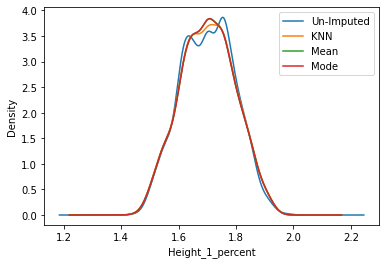

In [ ]:
# Statistical Difference in Height_1_percent column after KNN, Mean, Mode Imputation

data.Height.plot(kind="kde")
knn_impute_df.Height_1_percent.plot(kind="kde")
mean_impute_df.Height_1_percent.plot(kind="kde")
mode_impute_df.Height_1_percent.plot(kind="kde")
plt.legend(["Un-Imputed", "KNN", "Mean", "Mode"])
plt.xlabel("Height_1_percent")

Text(0.5, 0, 'Height_5_percent')

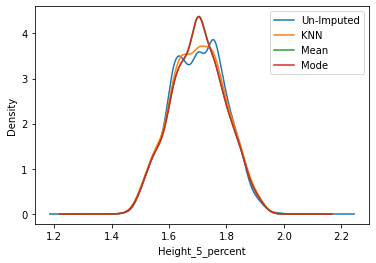

In [ ]:
# Statistical Difference in Height_5_percent column after KNN, Mean, Mode Imputation

data.Height.plot(kind="kde")
knn_impute_df.Height_5_percent.plot(kind="kde")
mean_impute_df.Height_5_percent.plot(kind="kde")
mode_impute_df.Height_5_percent.plot(kind="kde")
plt.legend(["Un-Imputed", "KNN", "Mean", "Mode"])
plt.xlabel("Height_5_percent")

Text(0.5, 0, 'Height_10_percent')

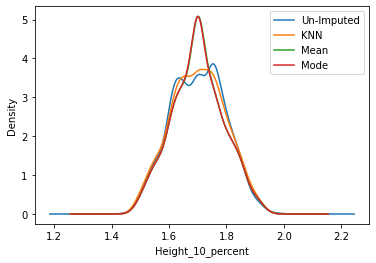

In [ ]:
# Statistical Difference in Height_10_percent column after KNN, Mean, Mode Imputation

data.Height.plot(kind="kde")
knn_impute_df.Height_10_percent.plot(kind="kde")
mean_impute_df.Height_10_percent.plot(kind="kde")
mode_impute_df.Height_10_percent.plot(kind="kde")
plt.legend(["Un-Imputed", "KNN", "Mean", "Mode"])
plt.xlabel("Height_10_percent")

It is clear from the above graphs that while imputing data, KNN works better than Mean and Mode for the choosen dataset.

# Building the model

In [ ]:
from scipy import stats

print("Data points before outlier removal: {}".format(len(data)))
data_removed_outliers = data[(np.abs(stats.zscore(data)) < 3).all(axis=1)]
print("Data points after outlier removal: {}".format(len(data_removed_outliers)))

Data points before outlier removal: 2111
Data points after outlier removal: 1914


### Train, Validation, and Test split

In [ ]:
# Define predictor and predicted datasets

x = data[['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']]
y = data[['NObeyesdad']]

print(x.head())

   Gender       Age  Height    Weight  family_history_with_overweight  FAVC  \
0       1  0.148936    1.62  0.186567                               1     0   
1       1  0.148936    1.52  0.126866                               1     0   
2       0  0.191489    1.80  0.283582                               1     0   
3       0  0.276596    1.80  0.358209                               0     0   
4       0  0.170213    1.78  0.379104                               0     0   

   FCVC  NCP  CAEC  SMOKE  CH2O  SCC  FAF  TUE  CALC  MTRANS  
0   2.0  3.0     2      0   2.0    0  0.0  1.0     3       4  
1   3.0  3.0     2      1   3.0    1  3.0  0.0     2       4  
2   2.0  3.0     2      0   2.0    0  2.0  1.0     1       4  
3   3.0  3.0     2      0   2.0    0  2.0  0.0     1       5  
4   2.0  1.0     2      0   2.0    0  0.0  0.0     2       4  


In [ ]:
from sklearn.model_selection import train_test_split

# Spliting data into Training set 76.5%, Validation set 13.5% and Test set 10%

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.1, random_state=1)
x_t, x_val, y_t, y_val = train_test_split(x_train, y_train, test_size=0.15, random_state=1)

**Q6.** Do the training and test sets have the same data?

In [ ]:
# Return False if Training and Testing data is completely seperate, orelse returns True
check_df = pd.merge(
    x_train,
    x_test,
    on=["Gender","Age", "Height", "Weight", "family_history_with_overweight","FAVC","FCVC","NCP","CAEC","SMOKE","CH2O","SCC",'FAF',"TUE","CALC","MTRANS"],
    how="left",
    indicator="Exist",
)
check_df["Exist"] = np.where(check_df.Exist == "both", True, False)
print(check_df["Exist"].value_counts())  # This code prints the number of unique data rows in training colomns

False    1886
True       26
Name: Exist, dtype: int64


As the fuction has returned true, we can say that the training and test datasets have few rows of same data.

### **Decision Tree**

In [ ]:
from sklearn.tree import DecisionTreeClassifier

# Creating the Decision Tree classifier object
clf_dt = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                          min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                          min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0
                                         )

# Training the model
clf_dt.fit(x_train, y_train)

# Predicton on test dataset using Decision Tree classifier
y_prediction_dt = clf_dt.predict(x_test)
print("Predicted values:")
print(y_prediction_dt)

Predicted values:
[1 2 6 5 4 5 3 5 3 3 6 4 3 4 2 3 6 4 2 7 3 3 7 3 3 3 4 6 7 4 3 5 7 6 1 3 1
 1 7 7 2 3 6 2 1 5 2 1 6 3 5 3 1 6 5 3 1 3 1 2 1 4 5 7 2 6 5 3 7 4 3 1 5 5
 4 4 1 7 4 5 6 6 5 3 1 7 2 5 2 5 7 7 5 6 2 4 1 6 5 5 1 3 2 2 5 7 2 4 3 3 3
 2 1 2 7 7 5 3 1 1 3 3 3 3 5 5 6 4 5 6 2 6 3 3 7 3 2 5 3 4 4 1 7 7 1 7 7 6
 5 5 3 3 1 7 6 3 5 1 7 4 3 5 1 4 5 2 7 1 7 1 6 5 6 6 5 4 7 4 3 3 6 6 3 6 7
 4 4 3 5 4 2 3 4 2 3 3 5 7 1 3 7 4 6 6 6 3 1 1 3 4 7 6]


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

# Calculating accuracy      
print("Confusion Matrix: ", confusion_matrix(y_test, y_prediction_dt))
print("Accuracy of Decision Tree classifier: ", accuracy_score(y_test,y_prediction_dt)*100)
print("Report : ", classification_report(y_test, y_prediction_dt))

Confusion Matrix:  [[27  4  0  0  0  0  0]
 [ 1 15  0  0  0  3  0]
 [ 0  0 43  3  0  0  1]
 [ 0  0  0 23  0  0  0]
 [ 0  0  0  0 33  0  0]
 [ 0  2  0  0  0 25  1]
 [ 0  0  4  0  0  0 27]]
Accuracy of Decision Tree classifier:  91.0377358490566
Report :                precision    recall  f1-score   support

           1       0.96      0.87      0.92        31
           2       0.71      0.79      0.75        19
           3       0.91      0.91      0.91        47
           4       0.88      1.00      0.94        23
           5       1.00      1.00      1.00        33
           6       0.89      0.89      0.89        28
           7       0.93      0.87      0.90        31

    accuracy                           0.91       212
   macro avg       0.90      0.91      0.90       212
weighted avg       0.91      0.91      0.91       212



###**Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Creating a Random Forest classifier object
clf_rf = RandomForestClassifier(n_estimators = 100)  
  
# Training the model
clf_rf.fit(x_train, y_train)
  
# Predicton on test dataset using Random Forest classifier
print("Predicted values:")
y_prediction_rf = clf_rf.predict(x_test)
print(y_prediction_rf)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Predicted values:
[1 2 2 5 4 5 3 5 3 3 2 4 3 3 2 3 6 4 2 7 3 3 7 3 3 3 4 6 7 4 3 5 7 6 1 3 1
 1 7 7 2 3 6 2 1 5 1 1 6 3 5 3 1 6 5 3 1 3 1 6 1 4 5 7 2 6 5 3 7 4 3 1 5 5
 4 4 1 7 4 5 6 6 5 7 1 7 2 5 2 5 7 7 5 6 1 4 1 6 5 5 1 3 6 2 5 7 2 4 3 3 3
 2 2 1 7 7 5 3 1 1 3 3 3 3 5 5 6 4 5 6 2 6 3 3 7 3 2 5 7 4 4 1 7 7 1 7 7 6
 5 5 3 3 1 7 6 3 5 1 7 4 3 5 1 4 5 2 2 1 7 1 6 5 6 6 5 4 7 4 3 3 6 6 7 2 7
 4 4 3 5 4 2 3 4 2 3 3 5 3 1 7 7 3 6 6 2 3 1 1 3 4 2 6]


In [ ]:
# Calculating accuracy
print("Confusion Matrix: ", confusion_matrix(y_test, y_prediction_rf))
print("Accuracy of Random Forest classifier: ", accuracy_score(y_test, y_prediction_rf)*100)
print("Report : ", classification_report(y_test, y_prediction_rf))

Confusion Matrix:  [[29  2  0  0  0  0  0]
 [ 1 17  0  0  0  1  0]
 [ 0  0 44  1  0  0  2]
 [ 0  0  0 23  0  0  0]
 [ 0  0  0  0 33  0  0]
 [ 0  3  0  0  0 25  0]
 [ 0  1  2  0  0  0 28]]
Accuracy of Random Forest classifier:  93.86792452830188
Report :                precision    recall  f1-score   support

           1       0.97      0.94      0.95        31
           2       0.74      0.89      0.81        19
           3       0.96      0.94      0.95        47
           4       0.96      1.00      0.98        23
           5       1.00      1.00      1.00        33
           6       0.96      0.89      0.93        28
           7       0.93      0.90      0.92        31

    accuracy                           0.94       212
   macro avg       0.93      0.94      0.93       212
weighted avg       0.94      0.94      0.94       212



### **Effect on the final predictive models after removing the outliers**

In [ ]:
# Define predictor and predicted datasets (without outliers)

x_ro = data_removed_outliers[['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS']]
y_ro = data_removed_outliers[['NObeyesdad']]

# Spliting data into Training, Validation, and Test set

x_train_ro, x_test_ro, y_train_ro, y_test_ro = train_test_split(x_ro, y_ro, test_size=0.1, random_state=1)
x_t_ro, x_val_ro, y_t_ro, y_val_ro = train_test_split(x_train_ro, y_train_ro, test_size=0.15, random_state=1)

#### Decision Tree (Prediction after removing the outliers)

In [ ]:
# Creating the Decision Tree classifier object
clf_dt_removed_outliers = DecisionTreeClassifier(criterion='gini', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, 
                                          min_weight_fraction_leaf=0.0, max_features=None, random_state=None, max_leaf_nodes=None, 
                                          min_impurity_decrease=0.0, class_weight=None, ccp_alpha=0.0
                                         )

# Training the model (without outliers)
clf_dt_removed_outliers.fit(x_train_ro, y_train_ro)

# Predicton on test dataset (without outliers) using Decision Tree classifier
y_prediction_dt_ro = clf_dt_removed_outliers.predict(x_test_ro)
print("Predicted values:")
print(y_prediction_dt_ro)

# Calculating accuracy     
print("Confusion Matrix: ", confusion_matrix(y_test_ro, y_prediction_dt_ro))
print("Accuracy of Decision Tree classifier: ", accuracy_score(y_test_ro, y_prediction_dt_ro)*100)
print("Report : ", classification_report(y_test_ro, y_prediction_dt_ro))

Predicted values:
[2 3 4 2 1 5 4 5 3 5 5 3 6 1 5 4 1 6 5 3 6 7 5 6 5 4 3 3 6 1 3 7 3 4 2 4 3
 7 7 7 1 2 7 4 7 3 7 6 5 3 6 5 4 2 4 5 4 1 4 5 2 3 5 6 7 1 2 6 4 7 3 1 2 2
 6 6 5 5 4 5 6 3 5 7 7 5 6 6 1 7 1 3 4 4 7 5 2 3 5 3 4 1 4 7 6 1 3 3 7 4 3
 5 5 3 1 7 1 6 5 5 1 4 3 1 7 7 7 3 6 3 2 6 4 7 2 6 7 7 1 4 7 4 4 7 3 5 3 3
 4 5 5 1 3 4 6 5 2 4 2 3 6 6 3 6 7 3 5 3 1 5 2 7 5 7 1 4 4 5 6 6 6 5 2 7 7
 1 1 4 4 2 6 7]
Confusion Matrix:  [[21  1  0  0  0  0  0]
 [ 1 15  0  0  0  1  0]
 [ 0  0 32  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 33  0  0]
 [ 0  1  0  0  0 25  0]
 [ 0  0  0  0  0  1 31]]
Accuracy of Decision Tree classifier:  97.39583333333334
Report :                precision    recall  f1-score   support

           1       0.95      0.95      0.95        22
           2       0.88      0.88      0.88        17
           3       1.00      1.00      1.00        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        33
           

#### Random Forest (Prediction after removing the outliers)

In [ ]:
# Creating a Random Forest classifier object
clf_rf_removed_outliers = RandomForestClassifier(n_estimators = 100)  
  
# Training the model (without outliers)
clf_rf_removed_outliers.fit(x_train_ro, y_train_ro)
  
# Predicton on test dataset (without outliers) using Random Forest classifier
print("Predicted values:")
y_prediction_rf_ro = clf_rf_removed_outliers.predict(x_test_ro)
print(y_prediction_rf_ro)

# Calculating accuracy
print("Confusion Matrix: ", confusion_matrix(y_test_ro, y_prediction_rf_ro))
print("Accuracy of Random Forest classifier: ", accuracy_score(y_test_ro, y_prediction_rf_ro)*100)
print("Report : ", classification_report(y_test_ro, y_prediction_rf_ro))

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


Predicted values:
[2 2 4 2 2 5 4 5 3 5 5 3 6 1 5 4 1 6 5 3 7 7 5 6 5 4 3 3 2 1 3 7 3 4 1 4 3
 7 7 7 1 2 7 4 7 3 7 6 5 3 6 5 4 2 4 5 4 1 4 5 2 3 5 6 7 1 2 6 4 7 3 1 2 2
 6 7 5 5 4 5 6 3 5 7 7 5 6 6 1 7 1 3 4 4 7 5 2 3 5 3 4 1 4 7 6 1 3 3 7 4 3
 5 5 3 2 7 1 6 5 5 1 4 3 1 7 7 7 3 6 3 2 6 4 7 2 6 7 7 1 4 7 4 4 7 3 5 3 3
 4 5 5 1 3 4 6 5 2 4 2 3 6 6 3 6 7 3 5 3 1 5 2 7 5 7 1 4 4 5 6 6 6 5 2 7 7
 1 1 4 4 2 6 7]
Confusion Matrix:  [[21  1  0  0  0  0  0]
 [ 0 17  0  0  0  0  0]
 [ 0  1 31  0  0  0  0]
 [ 0  0  0 30  0  0  0]
 [ 0  0  0  0 33  0  0]
 [ 0  1  0  0  0 24  1]
 [ 0  0  0  0  0  0 32]]
Accuracy of Random Forest classifier:  97.91666666666666
Report :                precision    recall  f1-score   support

           1       1.00      0.95      0.98        22
           2       0.85      1.00      0.92        17
           3       1.00      0.97      0.98        32
           4       1.00      1.00      1.00        30
           5       1.00      1.00      1.00        33
           

**Question 11**: Remove outliers and keep outliers (does if have an effect of the final predictive model)?

Accuracy of model before removing outliers:

1.   Decision Tree - 91.03%
2.   Random Forest - 94.33%

Accuracy of model after removing outliers:

1.   Decision Tree - 94.79%
2.   Random Forest - 97.39%

It is clear from the above evaluation metrics that the predictive model performs better after the removal of outliers from the dataset.

# Variable Importance

**Question 4**:- Which independent variables are useful to predict a target (dependent variable)? (Use at least three methods)


Three methods used to predict feature importance:

  1. Permutation Feature Importance: Calculates the decrease in model performance when the values of a feature are randomly permuted.
  2. Partial Dependence Plots: Graphical representation of the marginal effect of a feature on the prediction of a model.
  3. Shapley Values: A cooperative game theory approach that allocates the contribution of each feature to the prediction of the model in a fair manner.







### Permutation Feature Importance

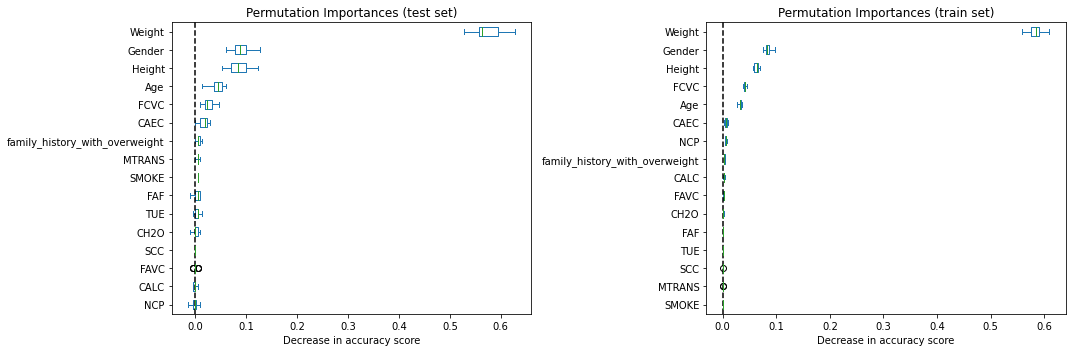

In [ ]:
from sklearn.inspection import permutation_importance
from matplotlib.pyplot import figure

# Calculate permutation importance for test data 
result_test = permutation_importance(clf_rf, x_test, y_test, n_repeats=20, random_state=42, n_jobs=2)

sorted_importances_idx_test = result_test.importances_mean.argsort()
importances_test = pd.DataFrame(result_test.importances[sorted_importances_idx_test].T, columns=x.columns[sorted_importances_idx_test],)

# Calculate permutation importance for training data 
result_train = permutation_importance(clf_rf, x_train, y_train, n_repeats=20, random_state=42, n_jobs=2)

sorted_importances_idx_train = result_train.importances_mean.argsort()
importances_train = pd.DataFrame(result_train.importances[sorted_importances_idx_train].T,columns=x.columns[sorted_importances_idx_train],)


f, axs = plt.subplots(1,2,figsize=(15,5))

importances_test.plot.box(vert=False, whis=10, ax = axs[0])
axs[0].set_title("Permutation Importances (test set)")
axs[0].axvline(x=0, color="k", linestyle="--")
axs[0].set_xlabel("Decrease in accuracy score")
axs[0].figure.tight_layout()

importances_train.plot.box(vert=False, whis=10, ax = axs[1])
axs[1].set_title("Permutation Importances (train set)")
axs[1].axvline(x=0, color="k", linestyle="--")
axs[1].set_xlabel("Decrease in accuracy score")
axs[1].figure.tight_layout()

### Partial Dependence Plots

Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead


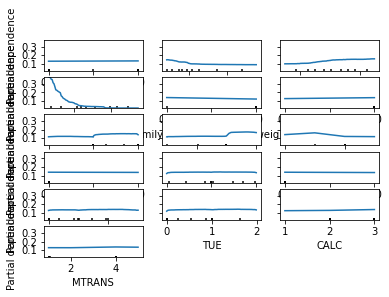

In [ ]:
from sklearn.inspection import plot_partial_dependence

features = ['Gender','Age','Height','Weight','family_history_with_overweight','FAVC','FCVC','NCP','CAEC','SMOKE','CH2O','SCC','FAF','TUE','CALC','MTRANS'] # select the features you want to plot
plot_partial_dependence(clf_rf, x_test, features, target = clf_rf.classes_[0])
plt.show()

# Conclusion

We can conclude from the analysis done on the dataset that all independent variables are significant and there is no multicollinearity between the independent variables.

# References

1.   [scikit-learn User Guide](https://scikit-learn.org/stable/user_guide.html)
2.   [ML Data Cleaning and Feature Selection](https://github.com/aiskunks/YouTube/blob/main/A_Crash_Course_in_Statistical_Learning/ML_Data_Cleaning_and_Feature_Selection/ML_Data_Cleaning_and_Feature_Selection_Wine_Quality.ipynb)
3.   https://towardsdatascience.com/introduction-to-shap-with-python-d27edc23c454
2.   https://christophm.github.io/interpretable-ml-book/pdp.html









